**Group Name:** Statisfaction\
**Group Members:** Momitha Yepuri (S3856512), Sai Sreshtaa Turaga (S3814571), Anne Maria Sunil (S3820057)

# <font size = 6.5, color=#4B52D2>Predicting Survival Rate of Patients In Heart Failure Data</font>

# <font size= 5.5, color=#4B52D2>Introduction</font>

This data set contains information about medical records of 299 heart failure patients, and we are trying to predict the survival rate of patients through **`ejection_fraction`** with the help of factors like **`serum_sodium`, `creatinine_phosphokinase`,`serum_creatinine`**,etc. using multiple linear regression. This dataset was sourced from Krembil Research Institute, Toronto, Canada and donated to the University of California Irvine Machine Learning Repository under the same Attribution 4.0 International (CC BY 4.0) copyright in January 2020 [here](http://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records).


# <font size= 5.5, color=#4B52D2>Table Of Contents:</font>
- [Overview](#Overview) section describes the dataset used and the features in this dataset.
- [Data Preparation](#Data-Preparation) section covers data cleaning and data preparation steps. 
- [Data Exploration](#Data-Exploration) section explores dataset features and their inter-relationships.
- [Statistical Modeling and Performance Evaluation](#Statistical-Modeling-and-Performance-Evaluation) section first fits a full multiple linear regression model and performs diagnostic checks. Next, we perform backwards variable selection using p-values to obtain a reduced model, after which we perform another set of diagnostic checks on the reduced model.
- [Summary and Conclusions](#Summary-and-Conclusions) section provides a summary of our work and presents our findings.
- [References](#References)

# <font size= 6.5, color=#4B52D2>Overview</font>

### <font color=#4B52D2>Data Source:</font>
The UCI Machine Learning Repository has a dataset which contains the medical records of 299 patients. The patient's data was collected during their follow-up period, where each patient's profile has 13 clinical features.
The dataset consists of 299 instances and 13 attributes. Since this meets the project requirements, we decided to use this dataset as it is. Our target variable is the **`ejection_fraction`**. 

### <font color=#4B52D2>Project Objective:</font>
Our aim is to predict the *survival rate of the heart patient* through **`ejection_fraction`** using multiple linear regression. Since decrease in ejection fraction indicates that the heart can not pump blood normally, it means the heart is not healthy enough. Ejection fraction is the main factor which determines whether the heart will function normally. Hence, we link the survival rate of the heart failure patients with ejection fraction.

### <font color=#4B52D2>Target Attribute:</font>
Our target attribute is **`ejection_fraction`**, which is a continuous numerical feature. Hence, our project is on a regression problem. Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60% means that 60% of the total amount of blood in the left ventricle is pushed out with each heartbeat.

### <font color=#4B52D2>Descriptive Features:</font>
The following are the variables in the dataset **`heart_failure_clinical_records_dataset`**:


| Name | Data Type | Units| Description|
|-------|-------|------|--------|
|age | numerical (continuous) | years | Age of the patient in years |
|anaemia | binary | NA | If a patient has anaemia (decrease of red blood cells or hemoglobin) |
|creatinine_phosphokinase | numerical (discrete) | mcg/L | level of the CPK enzyme (creatinine phosphokinase) in the blood |
|diabetes | binary | NA |  If the patient has diabetes |
|**ejection_fraction** (target)| numerical (discrete) | percentage | The percentage of blood leaving the heart at each contraction |
|high_blood_pressure | binary | NA |  If the patient has hypertension |
|platelets | numerical (continuous) | kiloplatelets/mL | The amount of platelets in the blood |
|serum_creatinine | numerical (continuous) | mg/dL | The level of serum creatinine in the blood |
|serum_sodium | numerical (discrete) | mEq/L | The level of serum sodium in the blood |
|sex | binary | NA | If the patient is a Female or Male |
|smoking | binary| NA | If the patient smokes or not |
|time | numerical (discrete) | days | Follow-up period in days |
|DEATH_EVENT | binary | NA | If the patient died during the follow-up period |

# <font size= 6.5, color=#4B52D2>Data Preparation</font>

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from IPython.display import display, HTML
import warnings
###
warnings.filterwarnings('ignore')
###
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

In [2]:
#reading the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.round(3)

## <font color=#4B52D2>Data Cleaning and Transformation</font>

In [3]:
print(f"Shape of the dataset is {df.shape} \n")

Shape of the dataset is (299, 13) 



In [4]:
print(df.dtypes)

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


## <font color=#4B52D2>Checking for missing values</font>

In [5]:
print(f"\nNumber of missing values for each feature:")
print(df.isnull().sum())


Number of missing values for each feature:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


Since none of the features contain any missing values we don't have to make any changes to the attributes.

## <font color=#4B52D2>Summary Statistics</font>


Summary of Numeric features ( Table - 1, 2 ):

In [6]:
display(HTML('<b>Table 1:</b>'))
df.describe(include = 'int64')

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,0.431438,581.839465,0.418060,38.083612,0.351171,136.625418,0.648829,0.32107,130.260870,0.32107
std,0.496107,970.287881,0.494067,11.834841,0.478136,4.412477,0.478136,0.46767,77.614208,0.46767
min,0.000000,23.000000,0.000000,14.000000,0.000000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,0.000000,116.500000,0.000000,30.000000,0.000000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,0.000000,250.000000,0.000000,38.000000,0.000000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,1.000000,582.000000,1.000000,45.000000,1.000000,140.000000,1.000000,1.00000,203.000000,1.00000
max,1.000000,7861.000000,1.000000,80.000000,1.000000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
display(HTML('<b>Table 2:</b>'))
df.describe(include='float64')

,age,platelets,serum_creatinine
count,299.000000,299.000000,299.00000
mean,60.833893,263358.029264,1.39388
std,11.894809,97804.236869,1.03451
min,40.000000,25100.000000,0.50000
25%,51.000000,212500.000000,0.90000
50%,60.000000,262000.000000,1.10000
75%,70.000000,303500.000000,1.40000
max,95.000000,850000.000000,9.40000


## <font color=#4B52D2>Target Feature</font>

In [8]:
df['ejection_fraction'].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

The range of `ejection_fraction` appears to be 14-80.

## <font color=#4B52D2>Fixing Column Names</font>

`smoking` is changed to `smoker`, to better suit the information it provides   
`DEATH_EVENT` is changed to `death_event`

In [9]:
df.rename(columns = {'smoking':'smoker','DEATH_EVENT':'death_event'}, inplace = True)

# <font size= 6.5, color=#4B52D2>Data Exploration</font>

The dataset can now be considered "clean" and it is ready for visualisation and statistical modeling.

## <font color=#4B52D2>Univariate Visualisation</font>

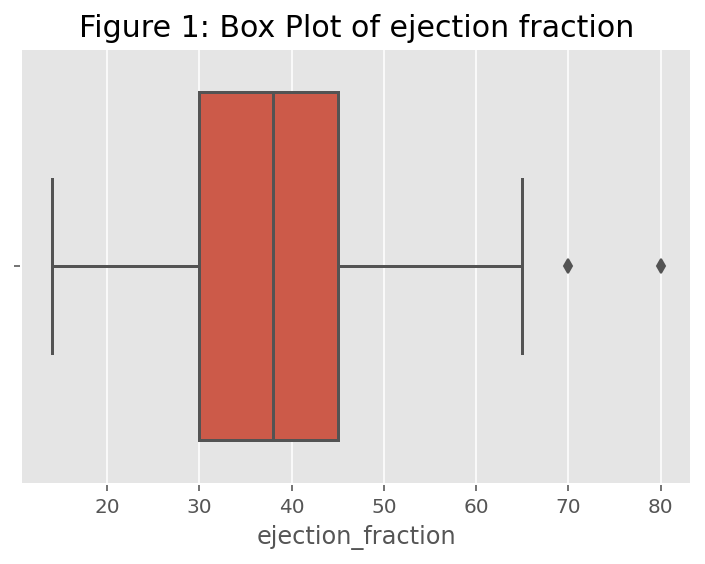

In [45]:
sns.boxplot(df['ejection_fraction']).set_title('Figure 1: Box Plot of ejection fraction', fontsize = 15)
plt.show();

`Figure 1` shows that the target variable is **right-skewed**. We can also see 2 suspected outliers.

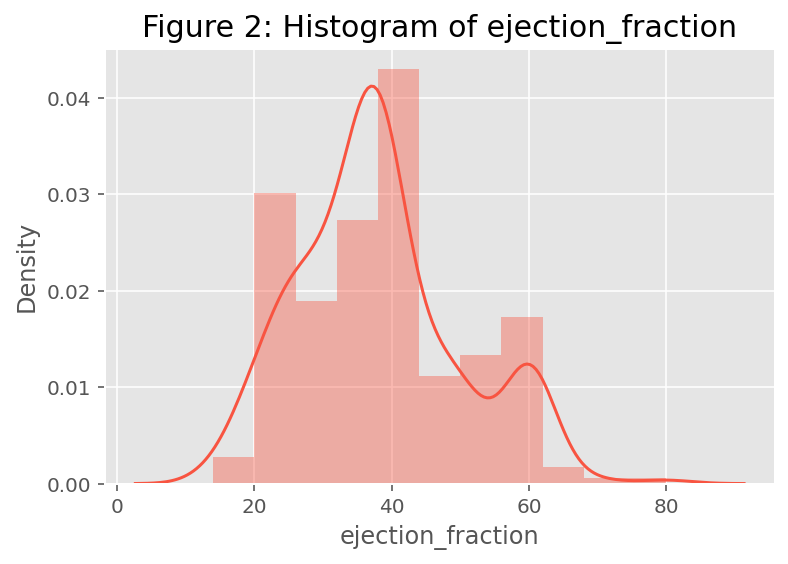

In [11]:
sns.distplot(df['ejection_fraction'], kde = True, color = '#f85441', bins = 11).set_title('Figure 2: Histogram of ejection_fraction', fontsize = 15)
plt.show();

We can see that the most common ejection fraction is between 35 and 40, and the distribution appears to be unimodal from `Figure 2`

**HISTOGRAMS OF THE NUMERICAL VARIABLES:**

Text(0.5, 1.0, 'Figure 4: Histogram of creatinine phosphokinase')

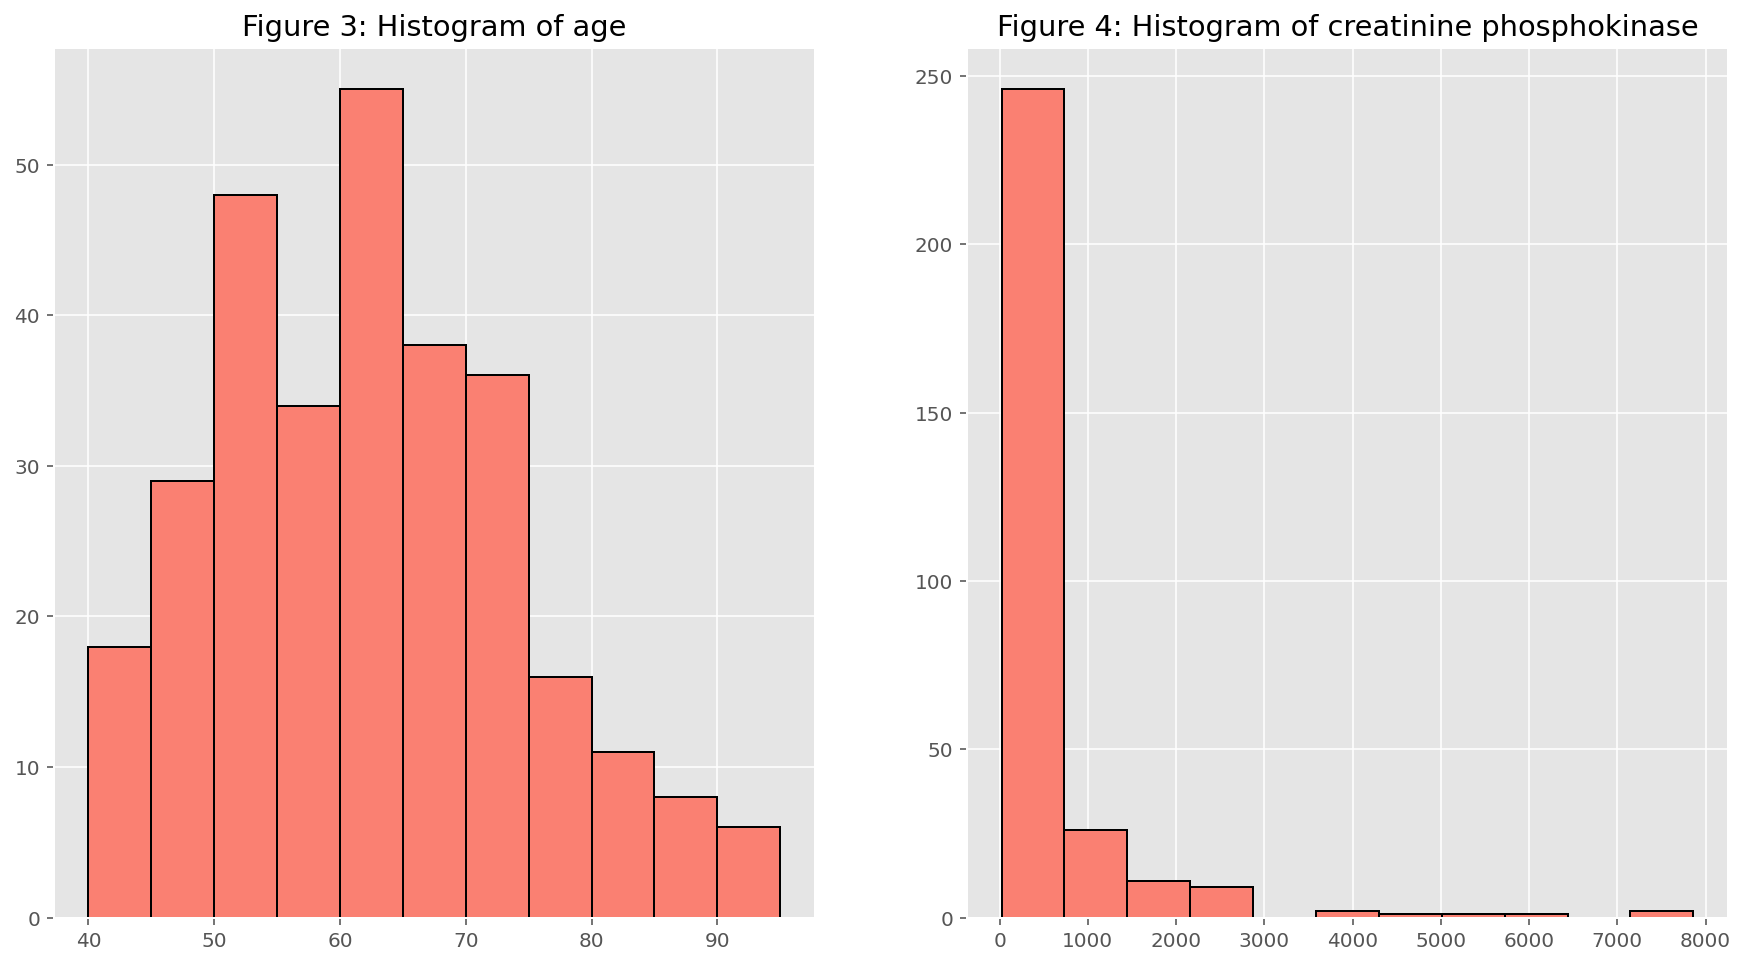

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.hist(df['age'], color= 'salmon', edgecolor = 'black', linewidth = 1, bins = 11)
ax1.set_title('Figure 3: Histogram of age')
ax2.hist(df['creatinine_phosphokinase'], color= 'salmon', edgecolor = 'black', linewidth = 1, bins = 11)
ax2.set_title('Figure 4: Histogram of creatinine phosphokinase')

Text(0.5, 1.0, 'Figure 6: Histogram of serum creatinine')

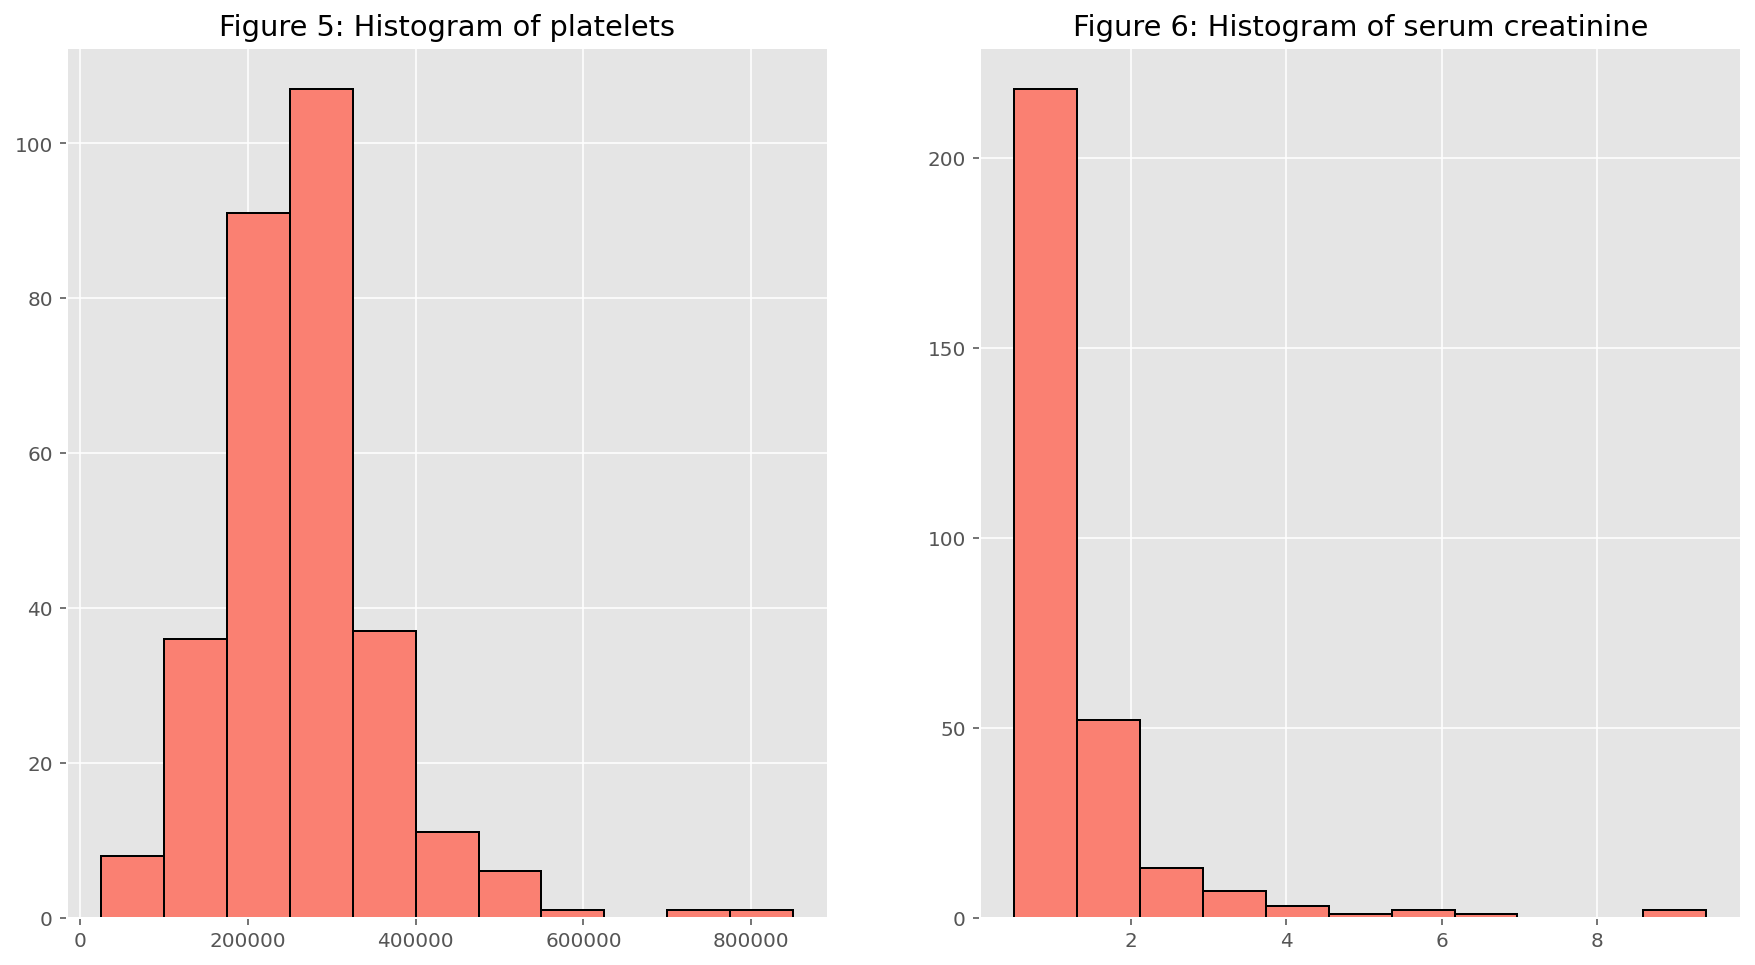

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.hist(df['platelets'], color= 'salmon', edgecolor = 'black', linewidth = 1, bins = 11)
ax1.set_title('Figure 5: Histogram of platelets')
ax2.hist(df['serum_creatinine'], color= 'salmon', edgecolor = 'black', linewidth = 1, bins = 11)
ax2.set_title('Figure 6: Histogram of serum creatinine')

Text(0.5, 1.0, 'Figure 8: Histogram of time')

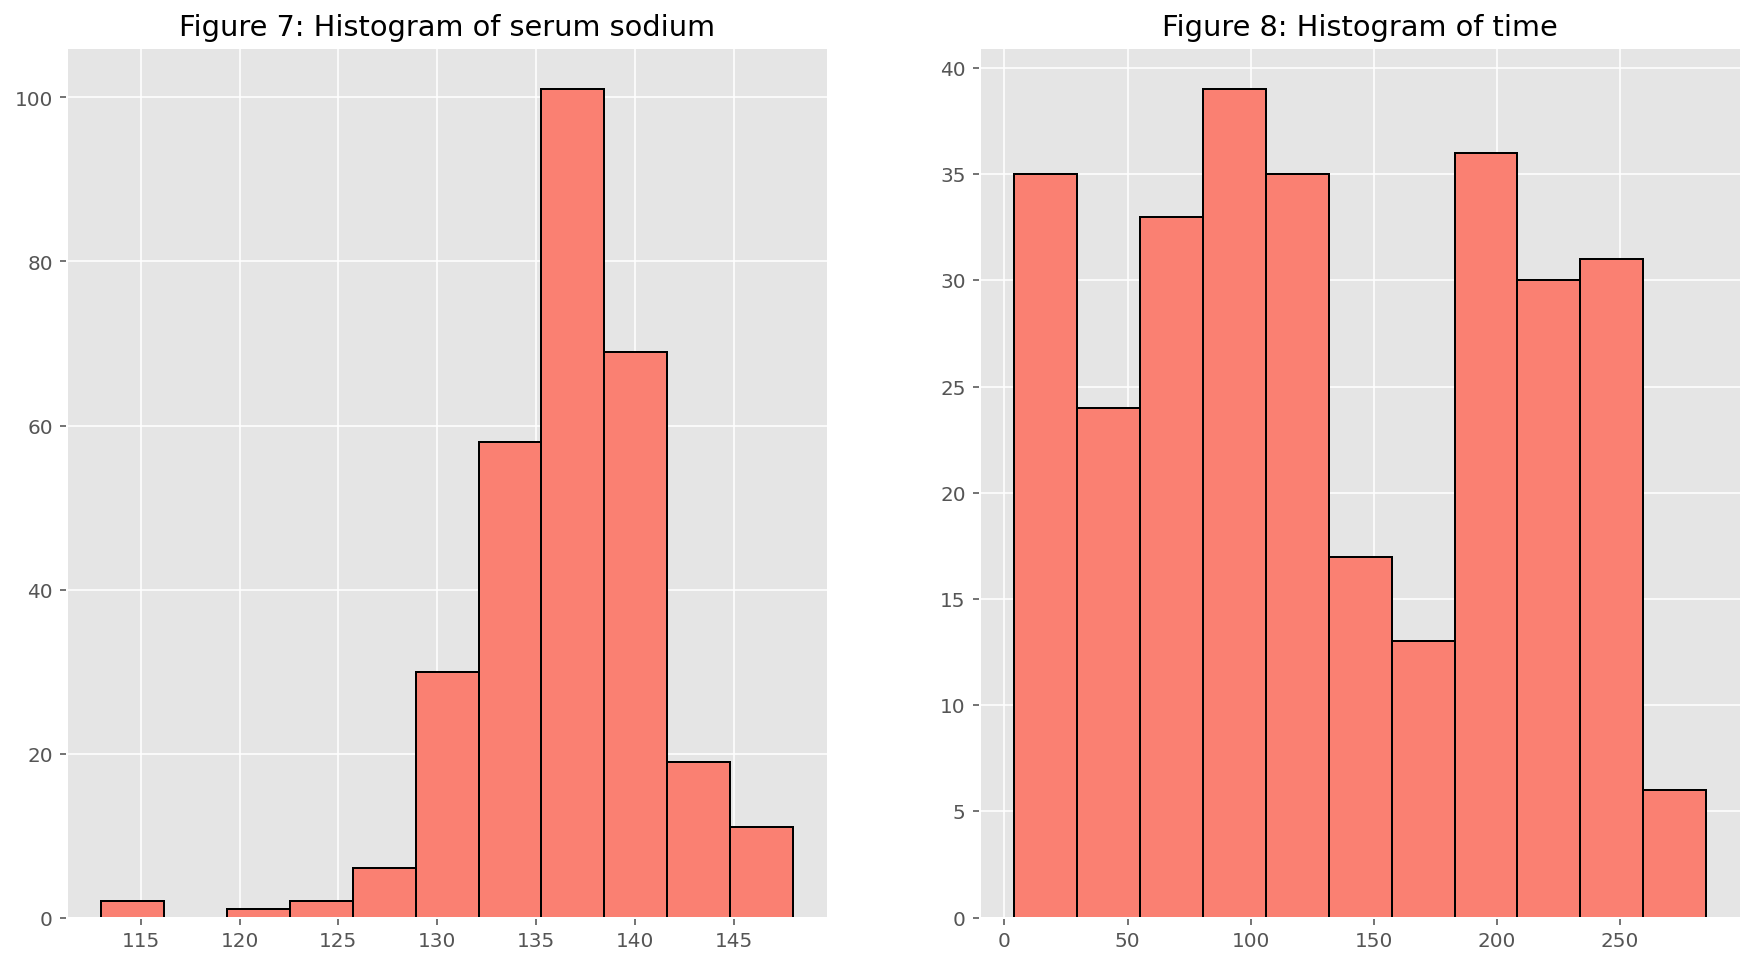

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.hist(df['serum_sodium'], color= 'salmon', edgecolor = 'black', linewidth = 1, bins = 11)
ax1.set_title('Figure 7: Histogram of serum sodium')
ax2.hist(df['time'], color= 'salmon', edgecolor = 'black', linewidth = 1, bins = 11)
ax2.set_title('Figure 8: Histogram of time')

**OBSERVATIONS FROM THE HISTOGRAMS:**

1. From figures 3 and 4, `age` is unimodal and has a nearly normal distribution, and `creatinine_phosphokinase` has a large positive skew and is unimodal.
2. From figures 5 and 6,`platelets` are right-skewed and unimodal, and `serum_creatinine` has a large positive skew and is unimodal.
3. From figures 7 and 8, `serum_sodium` is left-skewed and unimodal, and `time` is multimodal.

**BOXPLOTS OF THE NUMERICAL VARIABLES:**

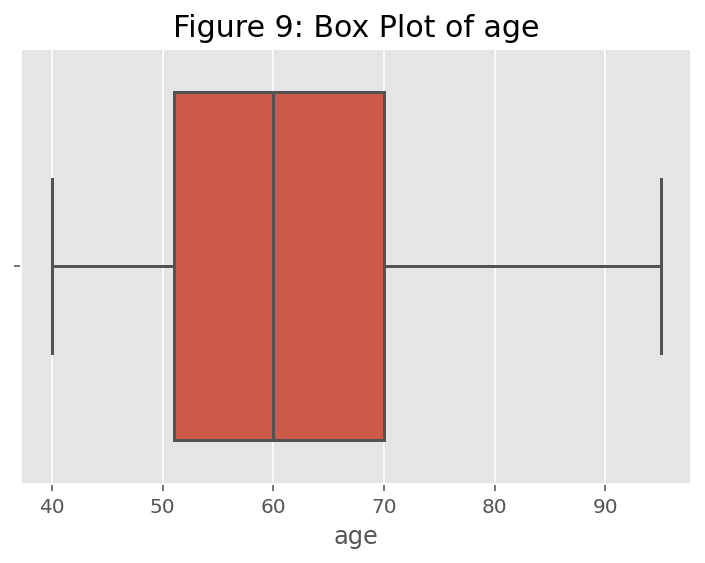

In [15]:
sns.boxplot(df['age']).set_title('Figure 9: Box Plot of age', fontsize = 15)
plt.show();

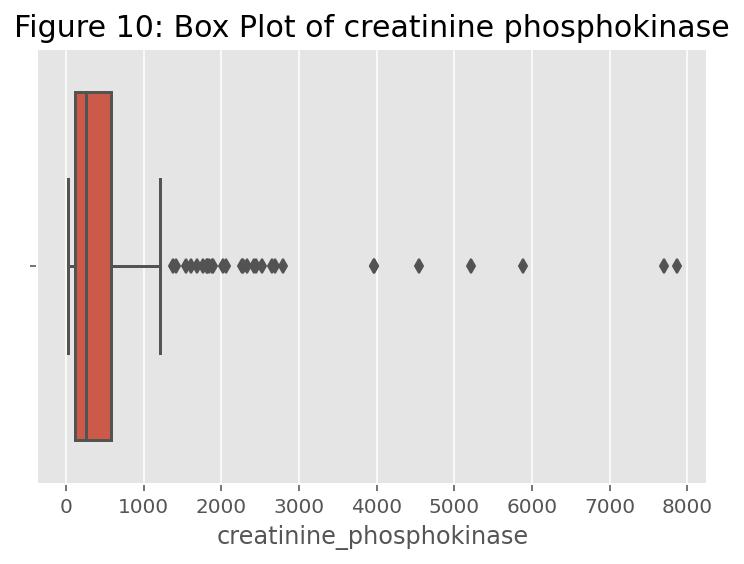

In [16]:
sns.boxplot(df['creatinine_phosphokinase']).set_title('Figure 10: Box Plot of creatinine phosphokinase', fontsize = 15)
plt.show();

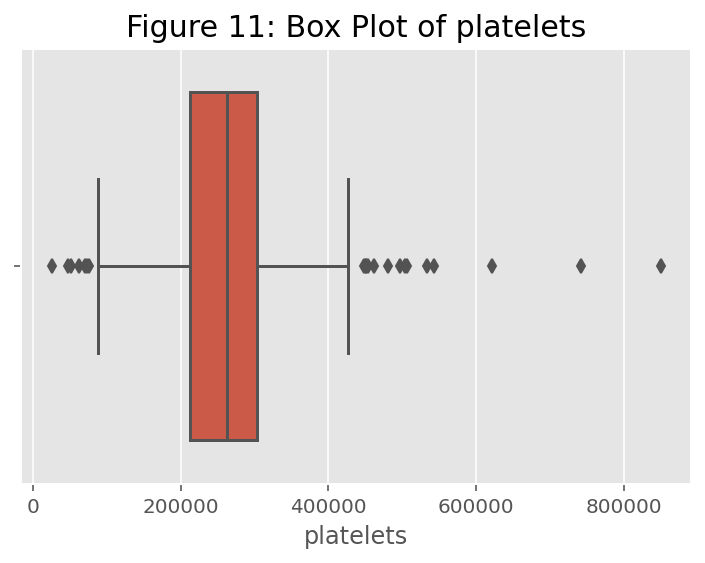

In [17]:
sns.boxplot(df['platelets']).set_title('Figure 11: Box Plot of platelets', fontsize = 15)
plt.show();

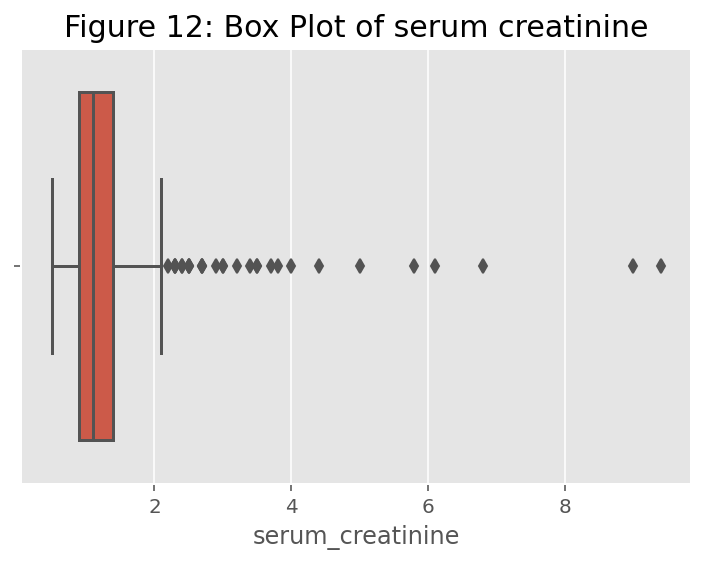

In [18]:
sns.boxplot(df['serum_creatinine']).set_title('Figure 12: Box Plot of serum creatinine', fontsize = 15)
plt.show();

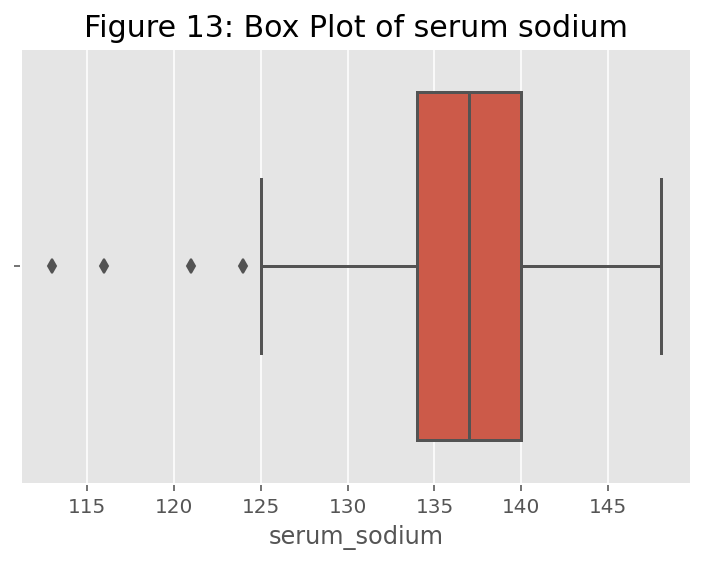

In [19]:
sns.boxplot(df['serum_sodium']).set_title('Figure 13: Box Plot of serum sodium', fontsize = 15)
plt.show();

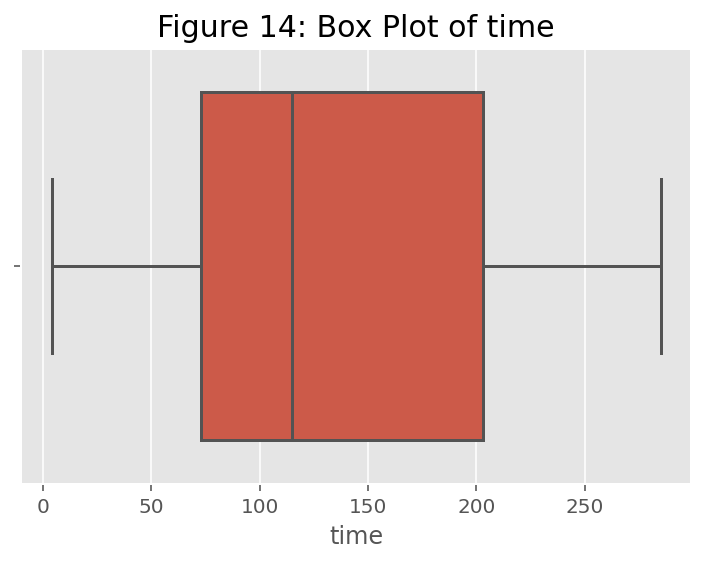

In [20]:
sns.boxplot(df['time']).set_title('Figure 14: Box Plot of time', fontsize = 15)
plt.show();

**OBSERVATIONS FROM THE BOX PLOTS:**

1. From figures 10-13, we can see that `creatinine_phosphokinase`, `platelets`, `serum_creatinine`, `serum_sodium` have a lot of outliers but we will keep them because they seem to give us information. `creatinine_phosphokinase`, `platelets`, `serum_creatinine` are right-skewed and `serum_sodium` is left-skewed.
2. From figures 9 and 14, we can see that `age` and `time` have no outliers and are right-skewed.

**BAR GRAPHS OF THE BINARY VARIABLES:**

Text(0.5, 1.0, 'Figure 15: Bar charts of binary variables:')

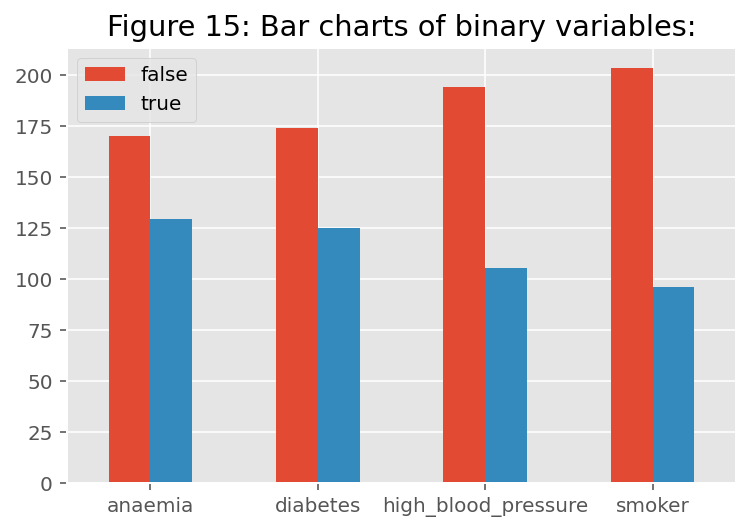

In [21]:
false = [170,174,194,203]
true = [129,125,105,96]
index = ['anaemia','diabetes', 'high_blood_pressure', 'smoker']
ds = pd.DataFrame({'false': false,'true': true}, index=index)
ax = ds.plot.bar(rot=0)
ax.set_title('Figure 15: Bar charts of binary variables:')

Text(0.5, 1.0, 'Figure 16: Bar chart of death event:')

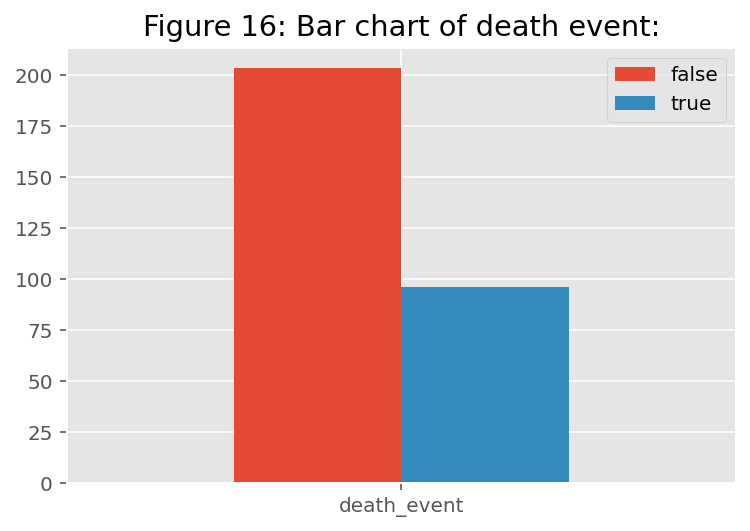

In [22]:
false = [203]
true = [96]
index = ['death_event']
ds = pd.DataFrame({'false': false,'true': true}, index=index)
ax = ds.plot.bar(rot=0)
ax.set_title('Figure 16: Bar chart of death event:')

Text(0.5, 1.0, 'Figure 17: Bar charts of gender:')

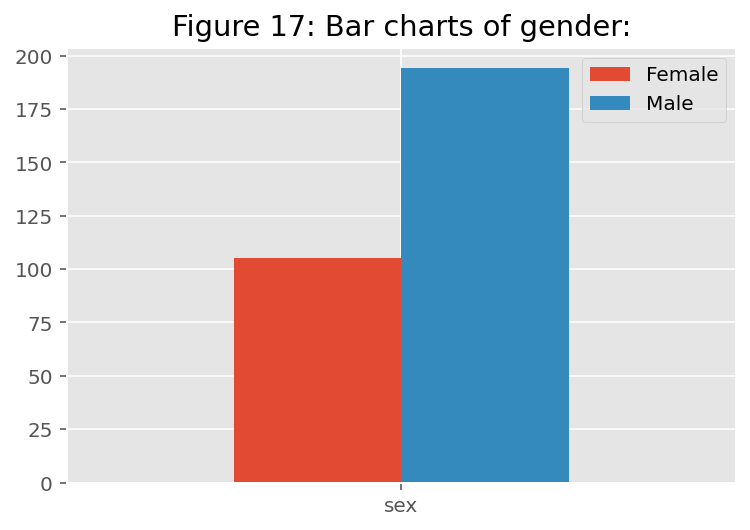

In [23]:
Female = [105]
Male = [194]
index = ['sex']
ds = pd.DataFrame({'Female': Female,'Male': Male}, index=index)
ax = ds.plot.bar(rot=0)
ax.set_title('Figure 17: Bar charts of gender:')

**OBSERVATIONS FROM THE BAR GRAPHS:**

From figures 15-17, we can observe that there are a lot less **anaemic, diabetic, high blood pressure and smoking** patients than **non-anaemic, non-diabetic, no high blood pressure and non-smoking** patients.

## <font color=#4B52D2>Multivariate Visualisation</font>

### <font color=#4B52D2>Scatter plots of numerical features and ejection_fraction </font>

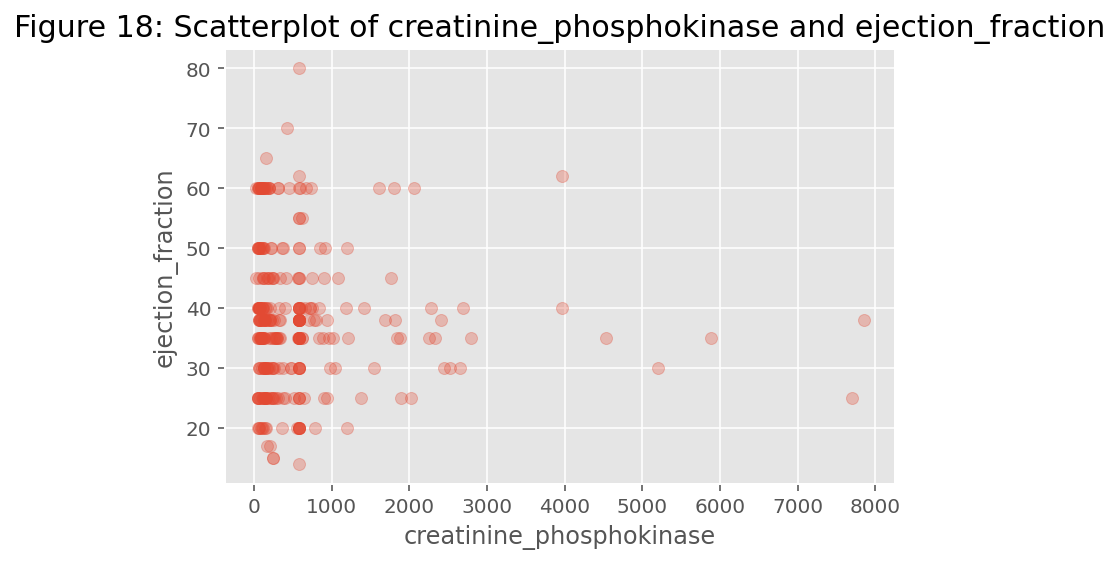

In [24]:
cpk = df['creatinine_phosphokinase']
plt.scatter(cpk, df['ejection_fraction'], alpha = 0.3)
plt.title('Figure 18: Scatterplot of creatinine_phosphokinase and ejection_fraction', fontsize = 15)
plt.xlabel('creatinine_phosphokinase')
plt.ylabel('ejection_fraction')
plt.show();

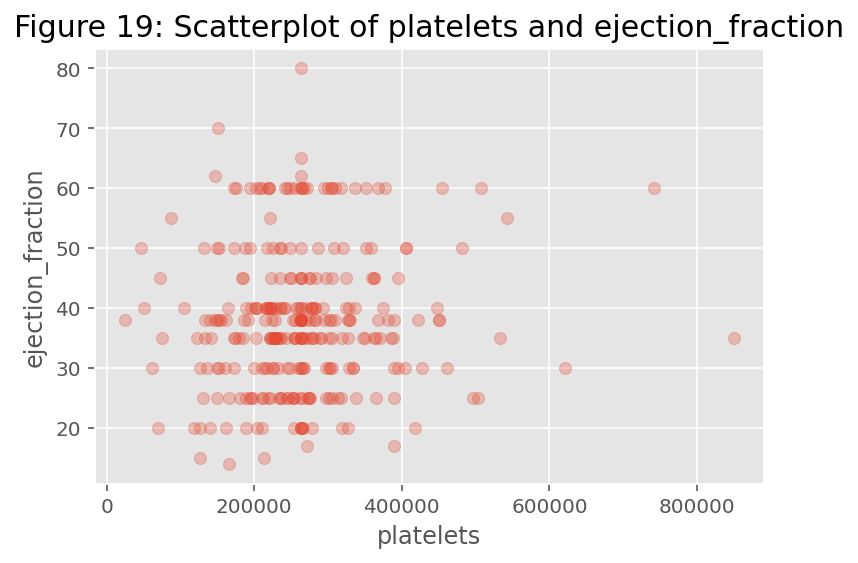

In [25]:
p = df['platelets']
plt.scatter(p, df['ejection_fraction'], alpha = 0.3)
plt.title('Figure 19: Scatterplot of platelets and ejection_fraction', fontsize = 15)
plt.xlabel('platelets')
plt.ylabel('ejection_fraction')
plt.show();

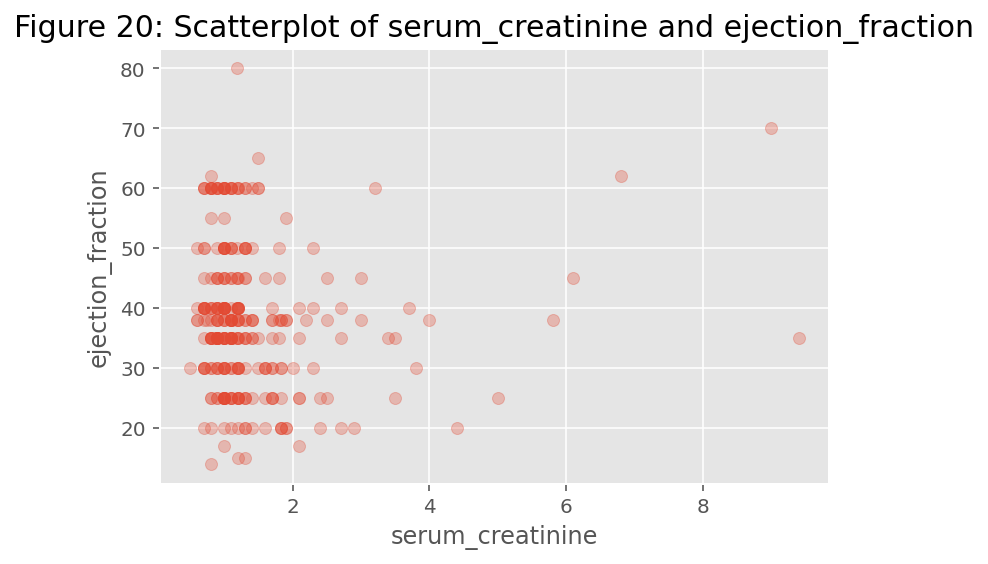

In [26]:
sc = df['serum_creatinine']
plt.scatter(sc, df['ejection_fraction'], alpha = 0.3)
plt.title('Figure 20: Scatterplot of serum_creatinine and ejection_fraction', fontsize = 15)
plt.xlabel('serum_creatinine')
plt.ylabel('ejection_fraction')
plt.show();

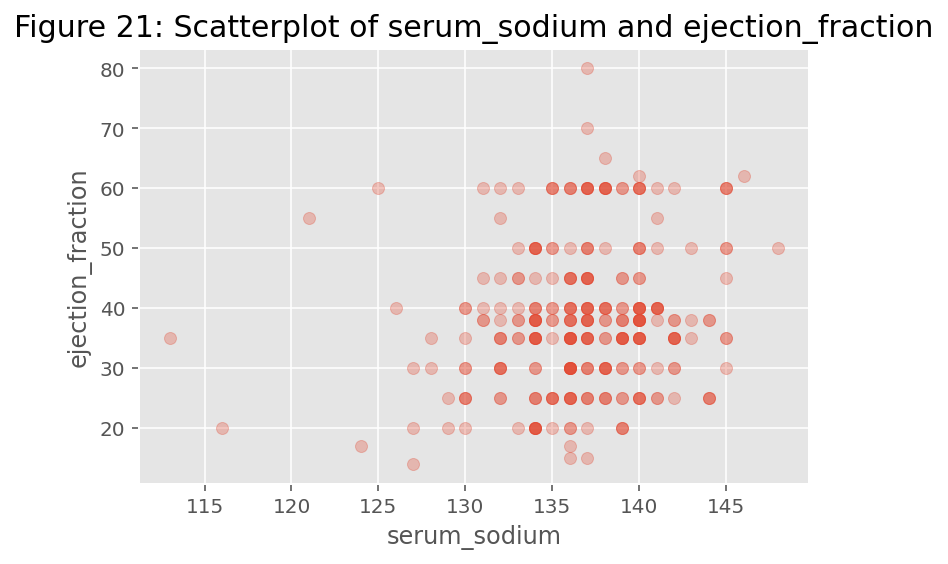

In [27]:
ss = df['serum_sodium']

plt.scatter(ss, df['ejection_fraction'], alpha = 0.3)
plt.title('Figure 21: Scatterplot of serum_sodium and ejection_fraction', fontsize = 15)
plt.xlabel('serum_sodium')
plt.ylabel('ejection_fraction')
plt.show();

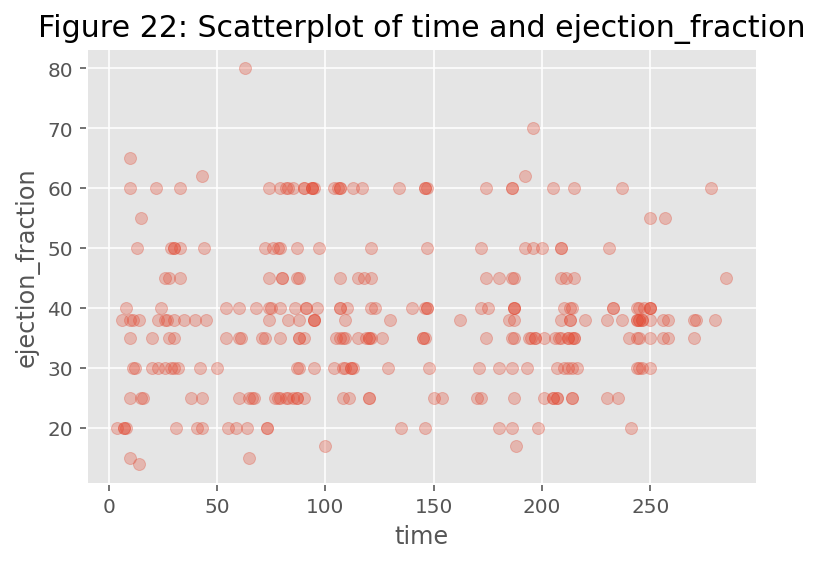

In [28]:
t = df['time']

plt.scatter(t, df['ejection_fraction'], alpha = 0.3)
plt.title('Figure 22: Scatterplot of time and ejection_fraction', fontsize = 15)
plt.xlabel('time')
plt.ylabel('ejection_fraction')
plt.show();

# <font color=#4B52D2>Statistical Modeling and Performance Evaluation</font>

## <font color=#4B52D2>Full Model</font>

In [29]:
pd.set_option('display.max_columns', None)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoker,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [30]:
formula_string_explan_var = ' + '.join(df.drop(columns='ejection_fraction').columns)
formula_string = 'ejection_fraction ~ ' + formula_string_explan_var
print('formula_string: ', formula_string)

formula_string:  ejection_fraction ~ age + anaemia + creatinine_phosphokinase + diabetes + high_blood_pressure + platelets + serum_creatinine + serum_sodium + sex + smoker + time + death_event


Experimenting with interaction terms, we tried adding **`age:sex`, `serum_sodium:death_event`, `creatinine_phosphokinase:death_event`, `sex:death_event`**, one at a time, and observed **`age:sex`** had an impact on adjusted R-squared, while others did not.

In [31]:
formula_string = formula_string + ' + age:sex'
print('formula_string: ', formula_string)

formula_string:  ejection_fraction ~ age + anaemia + creatinine_phosphokinase + diabetes + high_blood_pressure + platelets + serum_creatinine + serum_sodium + sex + smoker + time + death_event + age:sex


In [32]:
model_full = sm.formula.ols(formula=formula_string, data=df)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      ejection_fraction   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     3.881
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           8.48e-06
Time:                        14:58:16   Log-Likelihood:                -1138.2
No. Observations:                 299   AIC:                             2304.
Df Residuals:                     285   BIC:                             2356.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

The full model has an adjusted R-squared value of 0.112, which means that only 11% of the variance is explained by the model. By looking at the p-values, we observe that the majority of them are not highly significant, though there are a few significant variables at a 5% level.

Creating a new data frame for actual ejection_fraction vs. predicted ejection_fraction and the residuals for the full model. We will use this data frame when plotting predicted values and the regression residuals.

In [33]:
residuals_full = pd.DataFrame({'actual': df['ejection_fraction'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,20,33.217059,-13.217059
1,38,30.865888,7.134112
2,20,30.023066,-10.023066
3,20,31.645726,-11.645726
4,20,30.835379,-10.835379
5,40,36.006252,3.993748
6,15,34.526674,-19.526674
7,60,31.155247,28.844753
8,65,37.389158,27.610842
9,35,42.544135,-7.544135


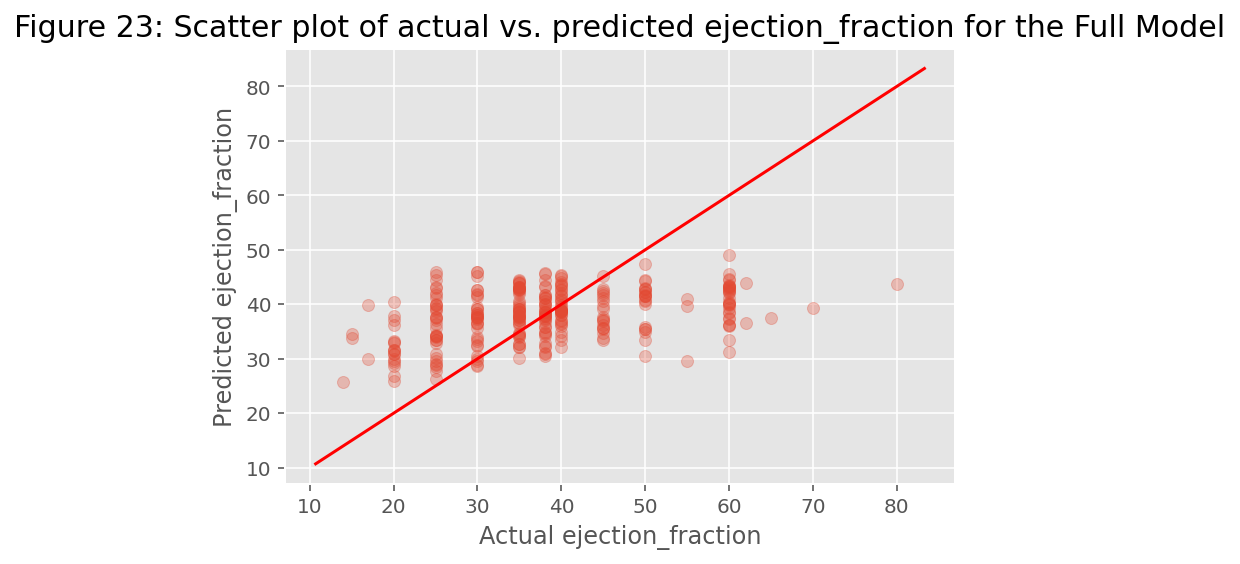

In [34]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual ejection_fraction');
plt.ylabel('Predicted ejection_fraction');
plt.title('Figure 23: Scatter plot of actual vs. predicted ejection_fraction for the Full Model', fontsize=15);
plt.show();

From `Figure 23`, we observe that the model never produces a prediction above 55 even though the maximum `ejection_fraction` in the dataset is 80. We will now check the diagnostics for the full model.

# <font color=#4B52D2>Full Model Diagnostic Checks</font>

We would like to check whether there are indications of violations of the regression assumptions, which are
1. linearity of the relationship between target variable and the independent variables
2. constant variance of the errors
3. normality of the residual distribution
4. statistical independence of the residuals
Let's first get a scatter plot of residuals (as a function of predicted ejection_fraction)

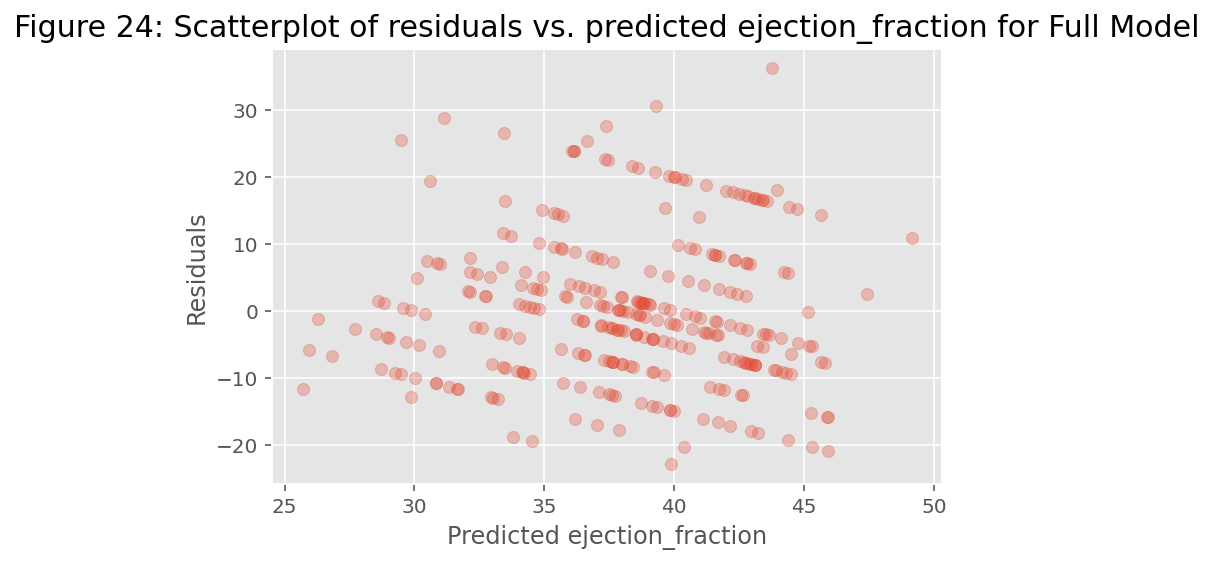

In [35]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted ejection_fraction');
plt.ylabel('Residuals')
plt.title('Figure 24: Scatterplot of residuals vs. predicted ejection_fraction for Full Model', fontsize=15)
plt.show();

From `Figure 24`, we can see that rather than being mostly random and centered around 0, this pattern indicates that the constant variability assumption of linear regression is not quite satisfied in this case.

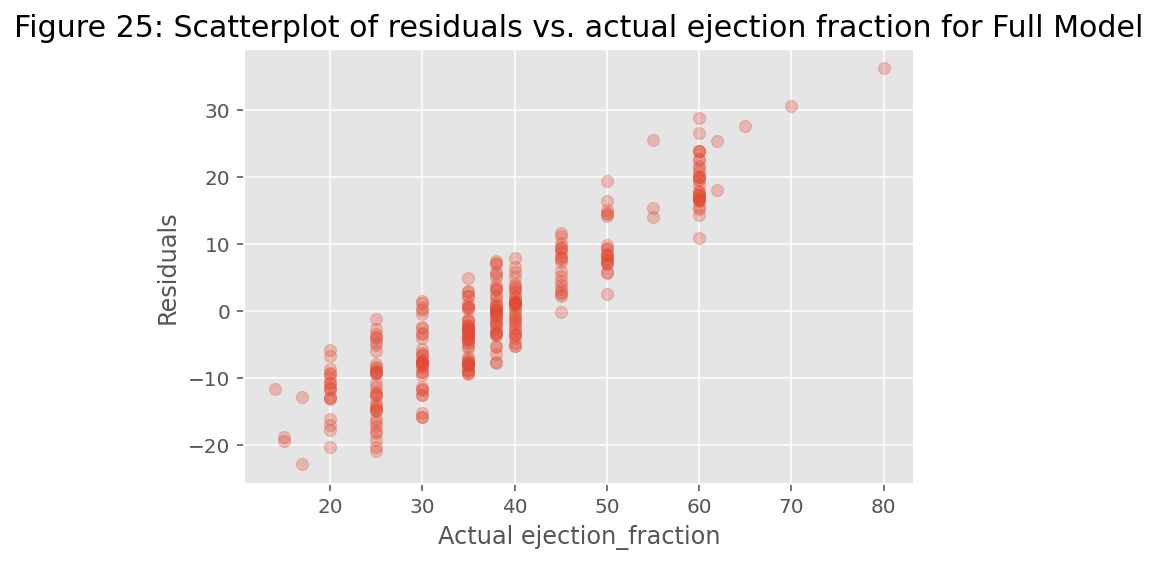

In [36]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual ejection_fraction');
plt.ylabel('Residuals')
plt.title('Figure 25: Scatterplot of residuals vs. actual ejection fraction for Full Model', fontsize=15)
plt.show();

From `Figure 25`, we notice that the model overestimates lower ejection fraction and underestimates higher ejection fraction. In particular, for ejection fractions below 40, the model predicts much higher ejection fractions. Also, for those above  ejection fraction of 40, the model predicts significantly lower ejection fractions.

The overlay the histograms of actual vs. predicted ejection_fraction on the same plot.

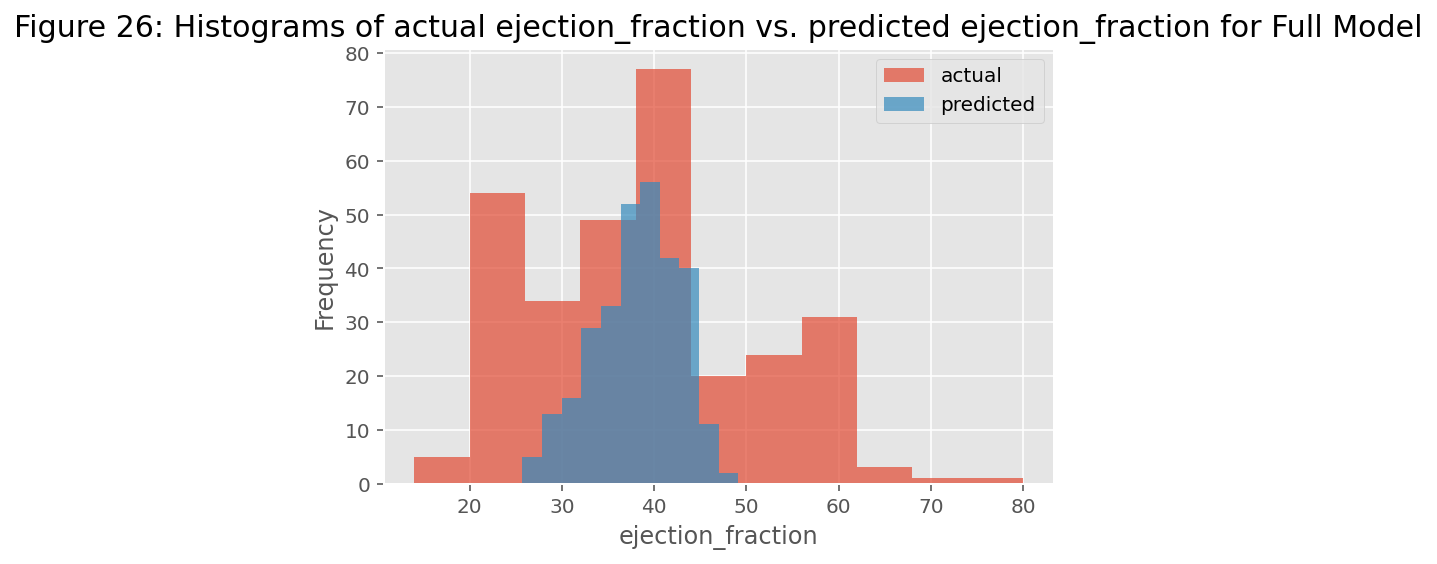

In [37]:
plt.hist(residuals_full['actual'], label='actual', bins=11, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=11, alpha=0.7);
plt.xlabel('ejection_fraction');
plt.ylabel('Frequency');
plt.title('Figure 26: Histograms of actual ejection_fraction vs. predicted ejection_fraction for Full Model', fontsize=15);
plt.legend()
plt.show();

From `Figure 26` we notice that their distributions are quite different. In particular, the model's predictions are highly clustered between mid 30's to mid 40's

We are now plotting the Histogram of the residuals.

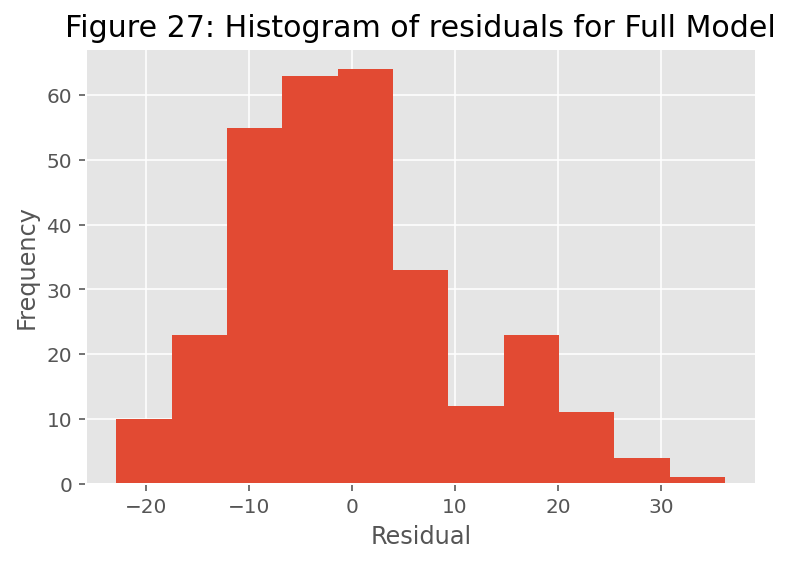

In [38]:
plt.hist(residuals_full['residual'], bins = 11);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 27: Histogram of residuals for Full Model', fontsize=15);
plt.show();

From `Figure 27`, the histogram of residuals looks slighty skewed to the right. However, it seems the normality assumption of linear regression is not significantly violated in this particular case.

# <font color=#4B52D2>Backwards Feature Selection</font>

In [39]:
# performing backwards elimination using p-values

patsy_description = patsy.ModelDesc.from_formula(formula_string)
linreg_fit = model_full_fitted
p_val_cutoff = 0.05

print('\nPerforming backwards feature selection using p-values:')

while True:
    
    print(linreg_fit.summary())

    p_values = linreg_fit.pvalues.drop(labels='Intercept')
    p_values = p_values.sort_values(ascending=False)
    term = p_values.index[0]
    pval = p_values[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): 
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: 
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=df).fit()
    

model_reduced_fitted = smf.ols(formula = patsy_description, data = df).fit()

print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:
                            OLS Regression Results                            
Dep. Variable:      ejection_fraction   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     3.881
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           8.48e-06
Time:                        14:58:17   Log-Likelihood:                -1138.2
No. Observations:                 299   AIC:                             2304.
Df Residuals:                     285   BIC:                             2356.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Defining a new data frame for actual ejection_fraction vs. predicted ejection_fraction and the residuals for the reduced model.

In [40]:
residuals_reduced = pd.DataFrame({'actual': df['ejection_fraction'], 
                            'predicted': model_reduced_fitted.fittedvalues, 
                            'residual': model_reduced_fitted.resid})
residuals_reduced.head(10)

,actual,predicted,residual
0,20,32.112577,-12.112577
1,38,30.606630,7.393370
2,20,29.944754,-9.944754
3,20,30.053288,-10.053288
4,20,28.307284,-8.307284
5,40,35.541168,4.458832
6,15,34.588564,-19.588564
7,60,29.745124,30.254876
8,65,36.088958,28.911042
9,35,34.080770,0.919230


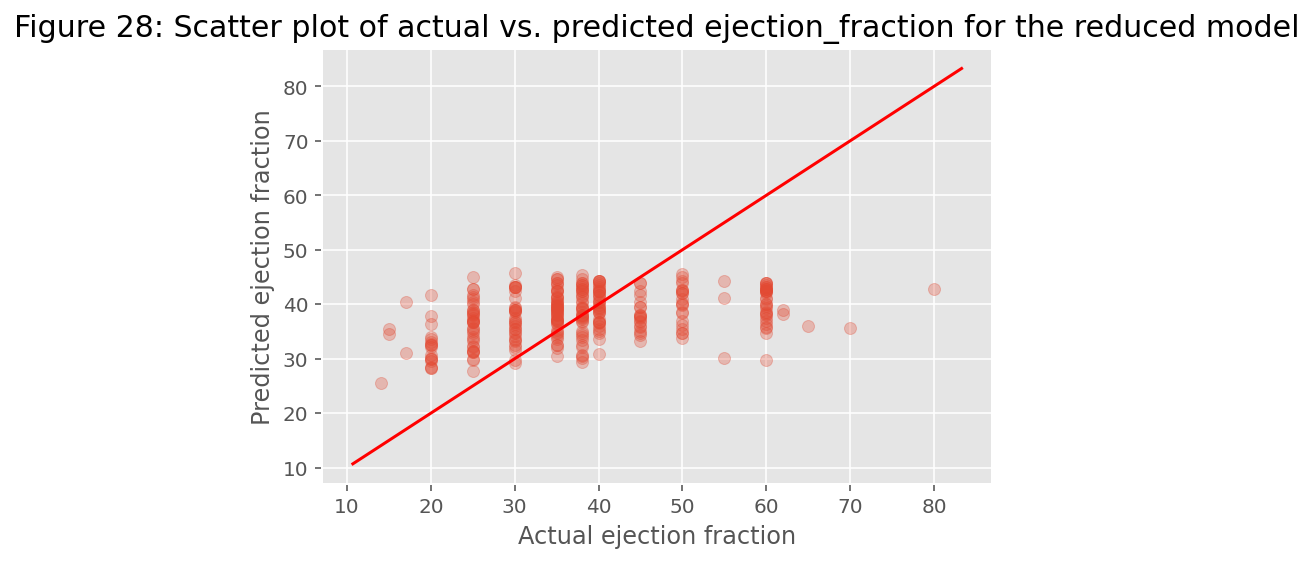

In [41]:
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual ejection fraction');
plt.ylabel('Predicted ejection fraction');
plt.title('Figure 28: Scatter plot of actual vs. predicted ejection_fraction for the reduced model', fontsize=15);
plt.show();

In [42]:
print(f'Our reduced model returns an Adjusted R-squared of {round (0.1188, 3)}. That means, it explains 11.9% variability in the ejection fraction in the heart failure patients.')

Our reduced model returns an Adjusted R-squared of 0.119. That means, it explains 11.9% variability in the ejection fraction in the heart failure patients.


The reduced model has 8 less variables compared to the full model. All the p-values of the reduced model are significant at the 5% level. We can say the difference between `Figure 23` and `Figure 28` is quite minimal despite dropping 8 attributes from the full model.

# <font color=#4B52D2>Reduced Model Diagnostic Checks</font>

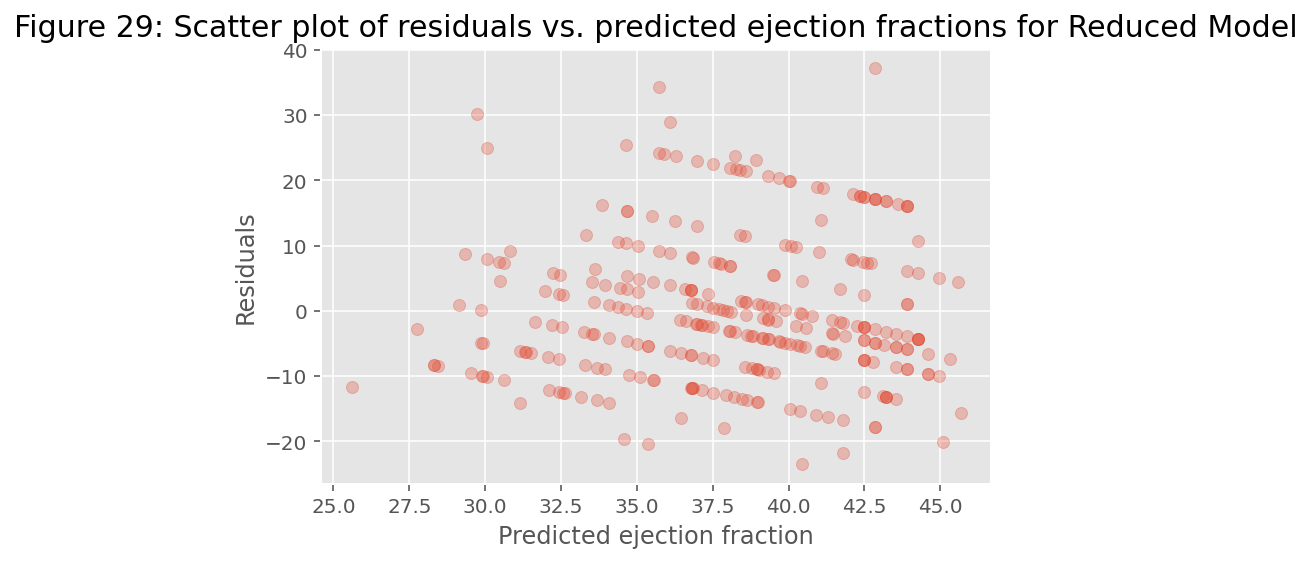

In [43]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted ejection fraction');
plt.ylabel('Residuals')
plt.title('Figure 29: Scatter plot of residuals vs. predicted ejection fractions for Reduced Model', fontsize=15)
plt.show();

Comparing `Figure 24` and `Figure 29`, they don't have much of a difference.

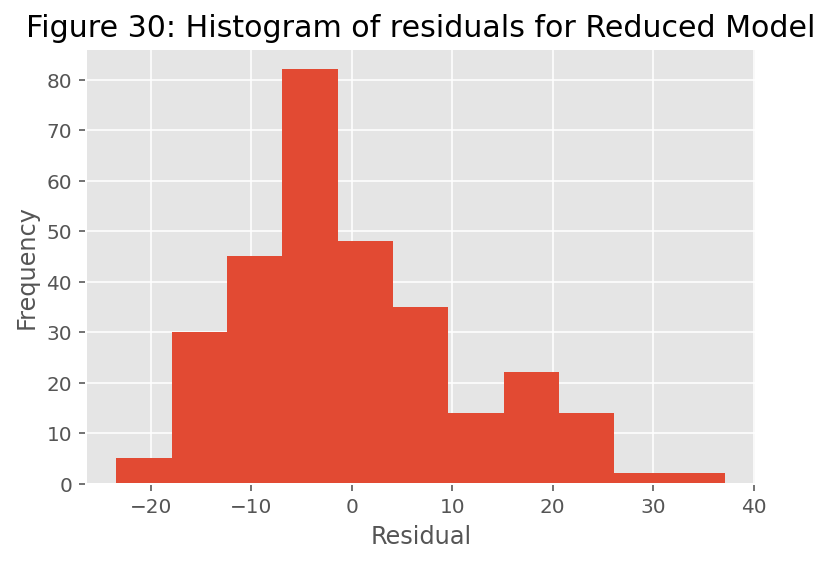

In [44]:
plt.hist(residuals_reduced['residual'], bins = 11);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 30: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

From `Figure 30`, there is a slightly symmetric histogram around zero, which implies that the residuals are nearly normally distributed.

# <font color=#4B52D2>Summary and Conclusions</font>

We started off with the full model and obtained an  Adjusted R-squared value of about 11%. After performing backwards variable selection, the Adjusted R-squared value increased to 11.88%, rounding it to 11.9%. The p-value cutoff was 0.05, and the reduced model has 8 less attributes. It consists of 3 variables and 1 interaction term, with a p-value of 0. The final multiple linear regression model has an Adjusted R-squared value of about 12%, which is extremely low.
This means that the data we have is not sufficient to predict the survial rate of a patient, and the model might need many more attributes to help determine it better. We noticed that the model overestimates lower ejection fraction and underestimates higher ejection fraction. In particular, for ejection fractions below 40, the model predicts much higher ejection fractions. Also, for those above  ejection fraction of 40, the model predicts significantly lower ejection fractions.

# <font color=#4B52D2>References</font>

Chicco, D., Jurman, G. (2020, February 3). Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making. https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#Sec2, 
[Last Accessed 2020-11-1]

Chicco, D., Jurman, G. (2020, February 3). UCI Machine Learning Repository [online]. Available at http://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records, 
[Last Accessed 2020-11-1]
